In [20]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("01train.xlsx")
data_test = pd.read_excel("01test.xlsx")
data_out = pd.read_excel("01test.xlsx")
data_train.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,58.785714,63.833333,43.213333,231.000000,0.039474,61.255411,3,0.053652,-0.037180,6235.000000,6029.000000,0,0.999244,1,0
1,52.357143,57.857143,58.053333,92.090000,0.732759,91.393846,4,0.074205,0.155243,1750.000000,1422.000000,0,0.950294,2,1
2,30.674860,36.714286,36.661527,836.239303,0.229050,68.931202,3,0.121504,0.031717,2679.476981,2200.824592,0,1.000000,1,0
3,32.119048,41.571429,63.213333,588.800000,0.090909,54.455267,3,0.153716,0.009326,362.900000,0.000000,0,0.918970,1,1
4,41.214286,49.404762,52.486667,683.900000,0.072727,61.922799,3,0.097287,-0.030090,2777.000000,2001.000000,0,0.906411,1,0


In [21]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


In [22]:
#依照xgbooost_feature選出的最佳combination

data_train.drop(['外型平均曲率','手機外殼/包膜指標','手機螢幕溫度(最大)','平均APP運作指標/小時','新機/二手/老舊','CPU效能等級'], axis=1, inplace=True)
data_test.drop(['id','外型平均曲率','手機外殼/包膜指標','手機螢幕溫度(最大)','平均APP運作指標/小時','新機/二手/老舊','CPU效能等級'], axis=1, inplace=True)

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

#name_list_outlier = ['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標',
                #'手機電池電量','手機外殼/包膜指標','外型平均曲率','上網頻率指標',
                #'通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)', '手機背蓋溫度(平均)','平均APP運作指標/小時', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier,n1=3,n2=3):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1

        # 定义离群值范围
        lower_bound = Q1 - n1 * IQR
        upper_bound = Q3 + n2 * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame




In [24]:
name_list_outlier =['手機螢幕溫度(平均)','手機背蓋溫度(平均)','充電時間指標','上網頻率指標','通話頻率指標','內容容量比率']

data=outlier_del(data_train,name_list_outlier)

手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3900,)
充電時間指標
Shape Of The Before Ouliers:  (3900,)
Shape Of The After Ouliers:  (3900,)
上網頻率指標
Shape Of The Before Ouliers:  (3900,)
Shape Of The After Ouliers:  (3900,)
通話頻率指標
Shape Of The Before Ouliers:  (3900,)
Shape Of The After Ouliers:  (3900,)
內容容量比率
Shape Of The Before Ouliers:  (3900,)
Shape Of The After Ouliers:  (3826,)


In [25]:
data_test.describe()

,手機螢幕溫度(平均),手機背蓋溫度(平均),充電時間指標,手機電池電量,CPU跑分階級,上網頻率指標,通話頻率指標,內容容量比率
count,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000,1777.000000
mean,39.383808,51.778120,0.227270,75.154126,3.323016,2564.871316,2225.209257,0.863548
std,14.856589,14.473741,0.227092,14.066583,0.676416,1837.430356,1815.895616,0.180826
min,8.296961,2.562656,0.000000,47.474747,3.000000,0.812024,0.000000,0.000000
25%,28.533183,43.513333,0.032967,62.807622,3.000000,1001.000000,618.791051,0.809392
50%,39.714286,53.286667,0.155779,76.875902,3.000000,2292.190025,1920.000000,0.933114
75%,50.571429,60.988103,0.373913,86.417749,3.000000,3840.000000,3482.000000,0.986112
max,75.619048,118.066667,0.966667,99.909812,6.000000,8683.000000,8476.000000,1.000000


In [26]:
import pandas as pd
import numpy as np

# 假設 data 是包含你的數據的 DataFrame
# 這裡假設 data 中包含你想要計算變異係數的特徵列

# 使用 describe 方法獲取特徵的統計摘要
data_describe = data.describe()

# 從統計摘要中獲取你想要計算變異係數的特徵列，假設特徵名稱為 '手機螢幕溫度(平均)' 等等
feature_names = ['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']

# 計算每個特徵的變異係數
variance_coefficients = {}
for feature_name in feature_names:
    std = data_describe.loc['std', feature_name]
    mean = data_describe.loc['mean', feature_name]
    variance_coefficients[feature_name] = std / mean

# 打印計算結果
for feature_name, coefficient in variance_coefficients.items():
    print(f"特徵 '{feature_name}' 的變異係數為: {coefficient}")


特徵 '手機螢幕溫度(平均)' 的變異係數為: 0.36767004477607257
特徵 '手機背蓋溫度(平均)' 的變異係數為: 0.2640485824696665
特徵 '充電時間指標' 的變異係數為: 1.030428536314878
特徵 '手機電池電量' 的變異係數為: 0.18696933610869906
特徵 '上網頻率指標' 的變異係數為: 0.713401329150779
特徵 '通話頻率指標' 的變異係數為: 0.8164901291809376
特徵 '內容容量比率' 的變異係數為: 0.17671151874328647


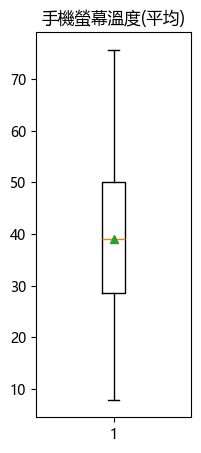

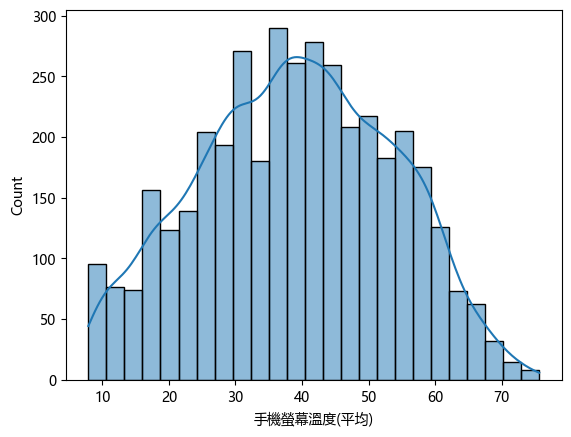

偏態(Skewness): -0.06
峰度(Kurtosis): -0.70


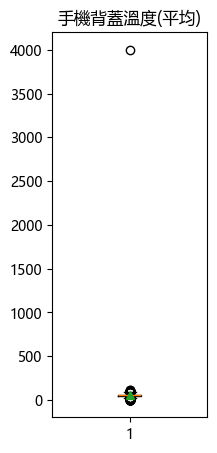

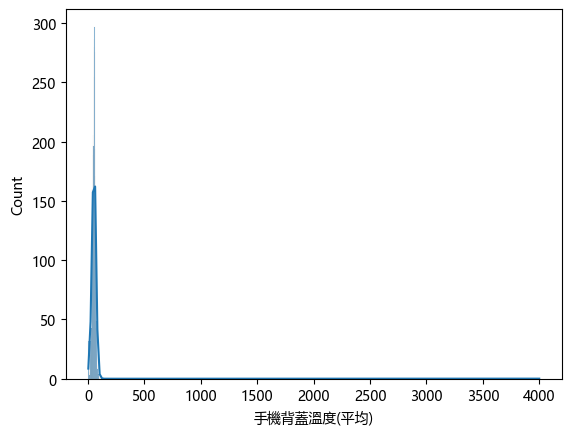

偏態(Skewness): 57.98
峰度(Kurtosis): 3533.85


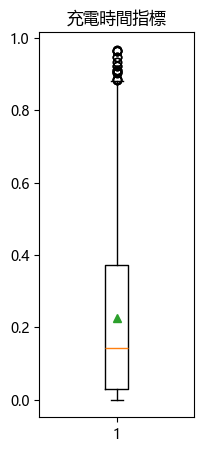

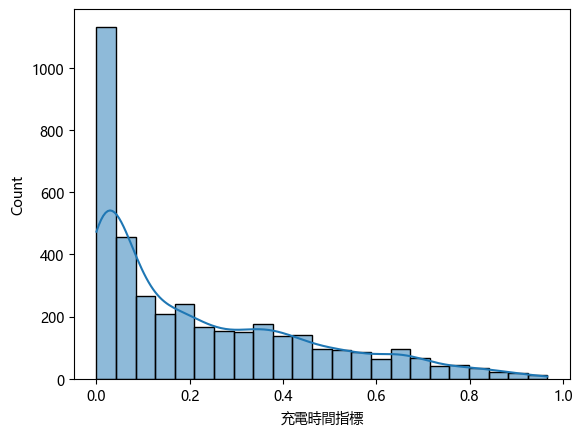

偏態(Skewness): 1.02
峰度(Kurtosis): 0.09


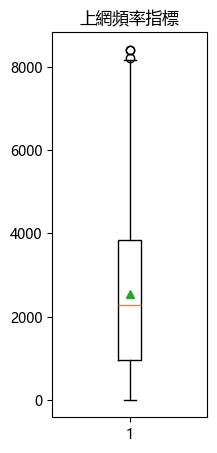

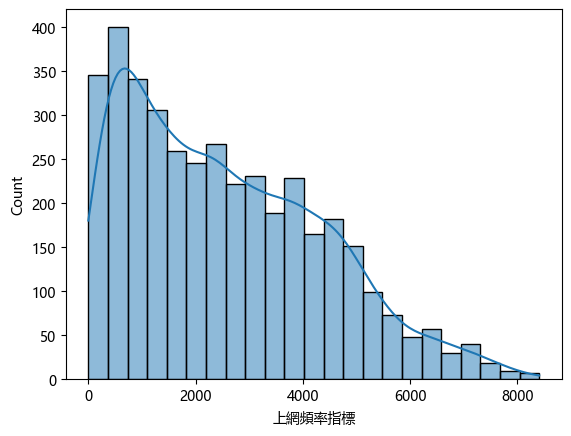

偏態(Skewness): 0.62
峰度(Kurtosis): -0.38


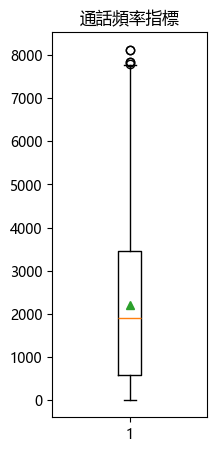

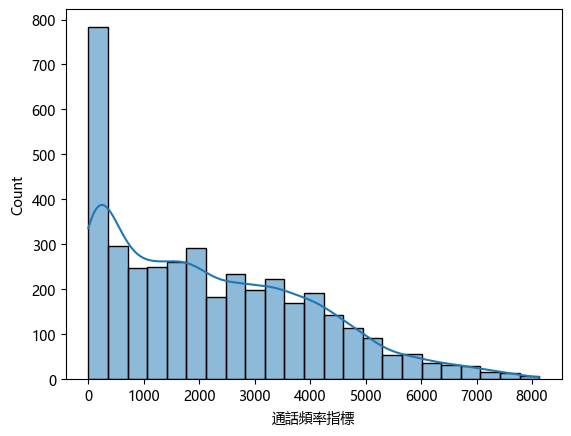

偏態(Skewness): 0.66
峰度(Kurtosis): -0.31


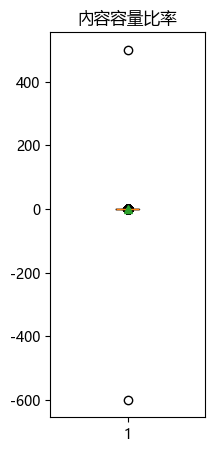

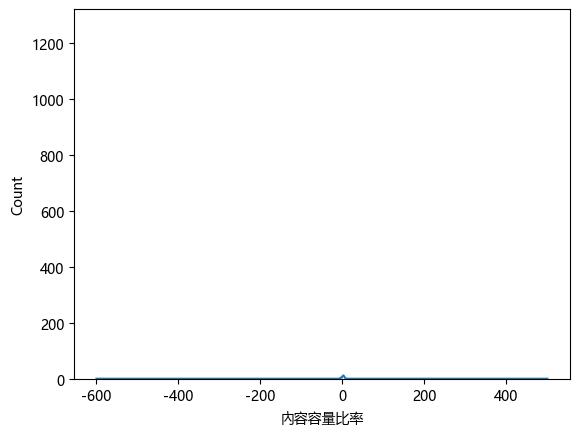

偏態(Skewness): -12.13
峰度(Kurtosis): 2015.74


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False

def box_graph(data_frame,name_list):
    for i in range(len(name_list)):
        plt.figure(figsize=(2,5))
        plt.boxplot(data_frame[name_list[i]],showmeans=True)   
        plt.title(name_list[i])
        plt.show()
        sns.histplot(data_frame[name_list[i]], kde=True)
        plt.show()
        print("偏態(Skewness): {:.2f}".format(data_frame[name_list[i]].skew()))
        print("峰度(Kurtosis): {:.2f}".format(data_frame[name_list[i]].kurt()))
        print('==================================================================================================')
box_graph(data_train,name_list_outlier)


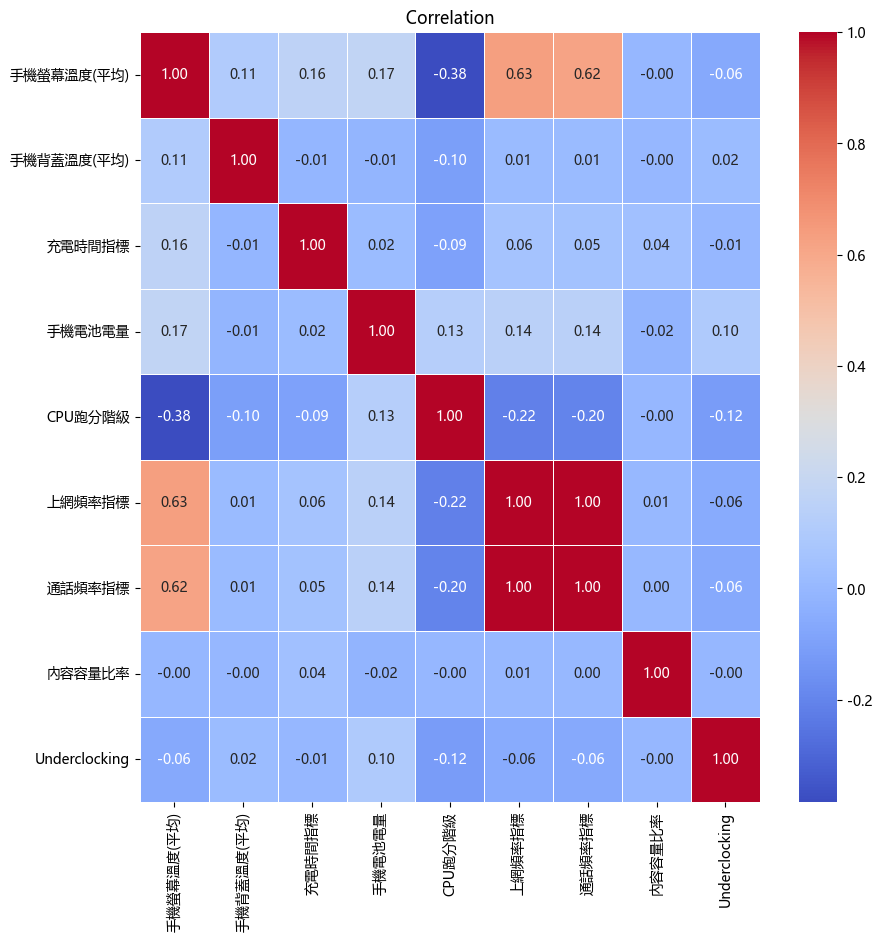

In [28]:

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [29]:
from sklearn.preprocessing import StandardScaler

# 定義需要標準化的欄位
columns_to_standardize = ['充電時間指標', '上網頻率指標', '通話頻率指標']

# 初始化標準化物件
standard_scaler  = StandardScaler()

# 將資料標準化
data_train[columns_to_standardize] = standard_scaler .fit_transform(data_train[columns_to_standardize])

# 顯示標準化後的資料
print(data_train.head())

   手機螢幕溫度(平均)  手機背蓋溫度(平均)    充電時間指標     手機電池電量  CPU跑分階級    上網頻率指標    通話頻率指標  \
0   58.785714   43.213333 -0.802437  61.255411        3  2.012340  2.110233   
1   52.357143   58.053333  2.182247  91.393846        4 -0.439244 -0.434794   
2   30.674860   36.661527  0.013715  68.931202        3  0.068825 -0.004551   
3   32.119048   63.213333 -0.581001  54.455267        3 -1.197459 -1.220343   
4   41.214286   52.486667 -0.659276  61.922799        3  0.122133 -0.114939   

     內容容量比率  Underclocking  
0  0.999244              0  
1  0.950294              1  
2  1.000000              0  
3  0.918970              1  
4  0.906411              0  


In [30]:
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = [ '手機螢幕溫度(平均)', '手機背蓋溫度(平均)','手機電池電量', 'CPU跑分階級','內容容量比率']

# 初始化標準化物件
min_max_scaler = MinMaxScaler()

# 將資料標準化
data[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

# 顯示標準化後的資料
print(data.head())

   手機螢幕溫度(平均)  手機背蓋溫度(平均)    充電時間指標    手機電池電量   CPU跑分階級       上網頻率指標  \
0    0.750964    0.399696  0.039474  0.256490  0.000000  6235.000000   
1    0.655858    0.545610  0.732759  0.834848  0.333333  1750.000000   
2    0.335086    0.335276  0.229050  0.403789  0.000000  2679.476981   
3    0.356452    0.596345  0.090909  0.125995  0.000000   362.900000   
4    0.491009    0.490876  0.072727  0.269297  0.000000  2777.000000   

        通話頻率指標    內容容量比率  Underclocking  
0  6029.000000  0.998987              0  
1  1422.000000  0.933391              1  
2  2200.824592  1.000000              0  
3     0.000000  0.891416              1  
4  2001.000000  0.874586              0  


In [31]:
from sklearn.preprocessing import StandardScaler

# 定義需要標準化的欄位
columns_to_standardize = ['充電時間指標', '上網頻率指標', '通話頻率指標']

# 初始化標準化物件
standard_scaler  = StandardScaler()

# 將資料標準化
data_test[columns_to_standardize] = standard_scaler .fit_transform(data_test[columns_to_standardize])



In [32]:
from sklearn.preprocessing import MinMaxScaler


columns_to_normalize = [ '手機螢幕溫度(平均)', '手機背蓋溫度(平均)','手機電池電量', 'CPU跑分階級','內容容量比率']

# 初始化標準化物件
min_max_scaler = MinMaxScaler()

# 將資料標準化
data_test[columns_to_normalize] = min_max_scaler.fit_transform(data_test[columns_to_normalize])



In [33]:
#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
x_data = data_train[feature_ex].to_numpy()




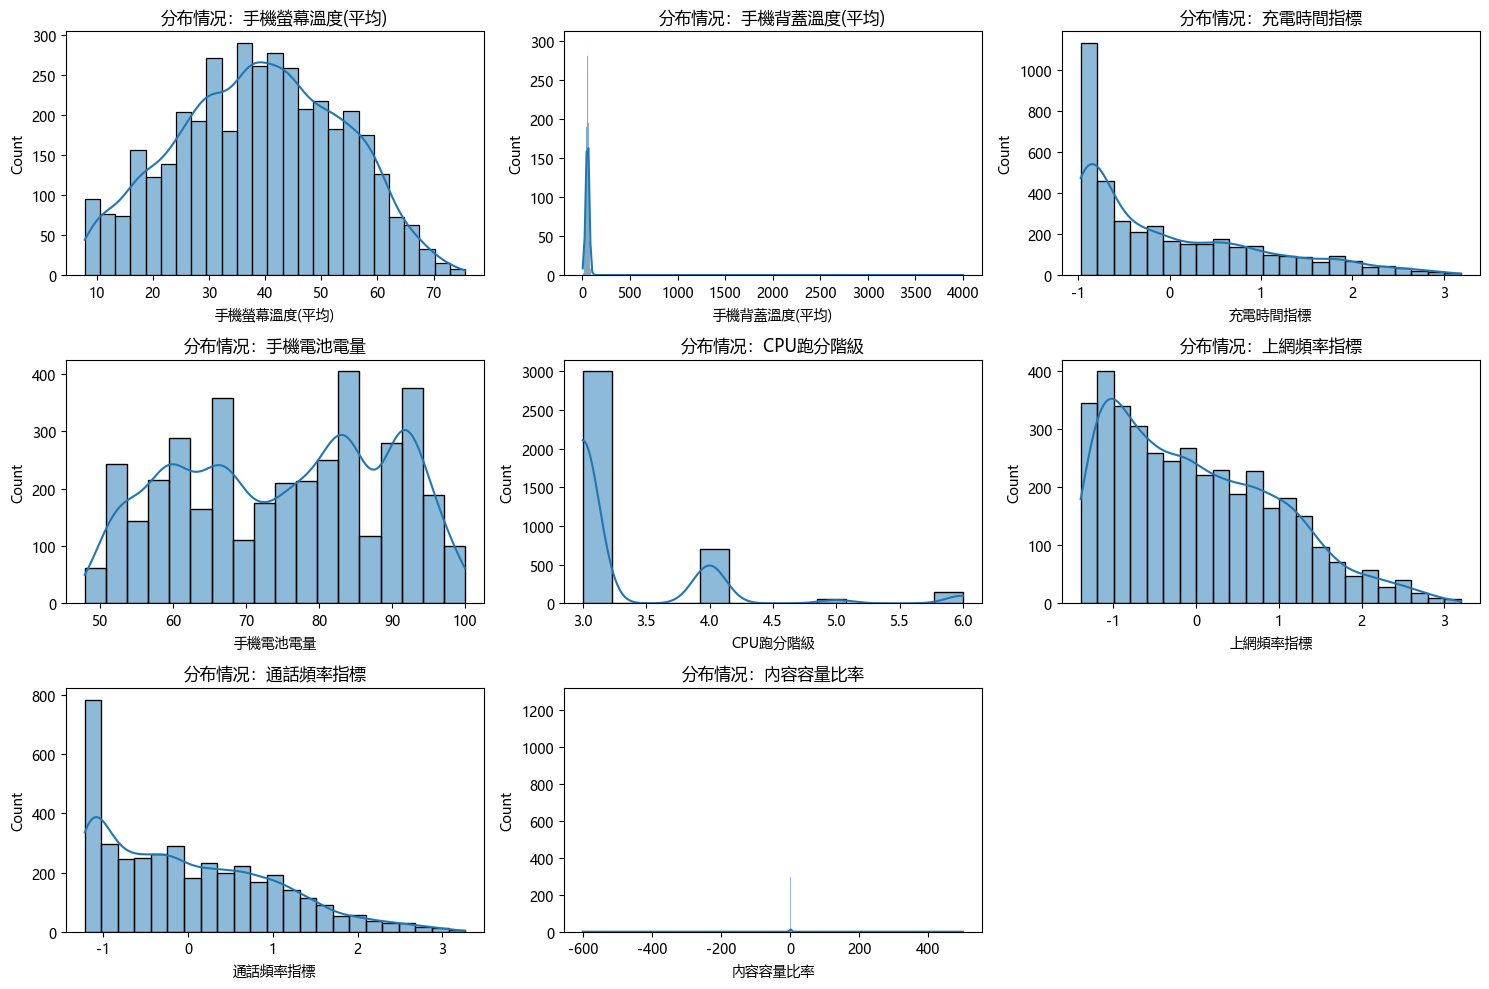

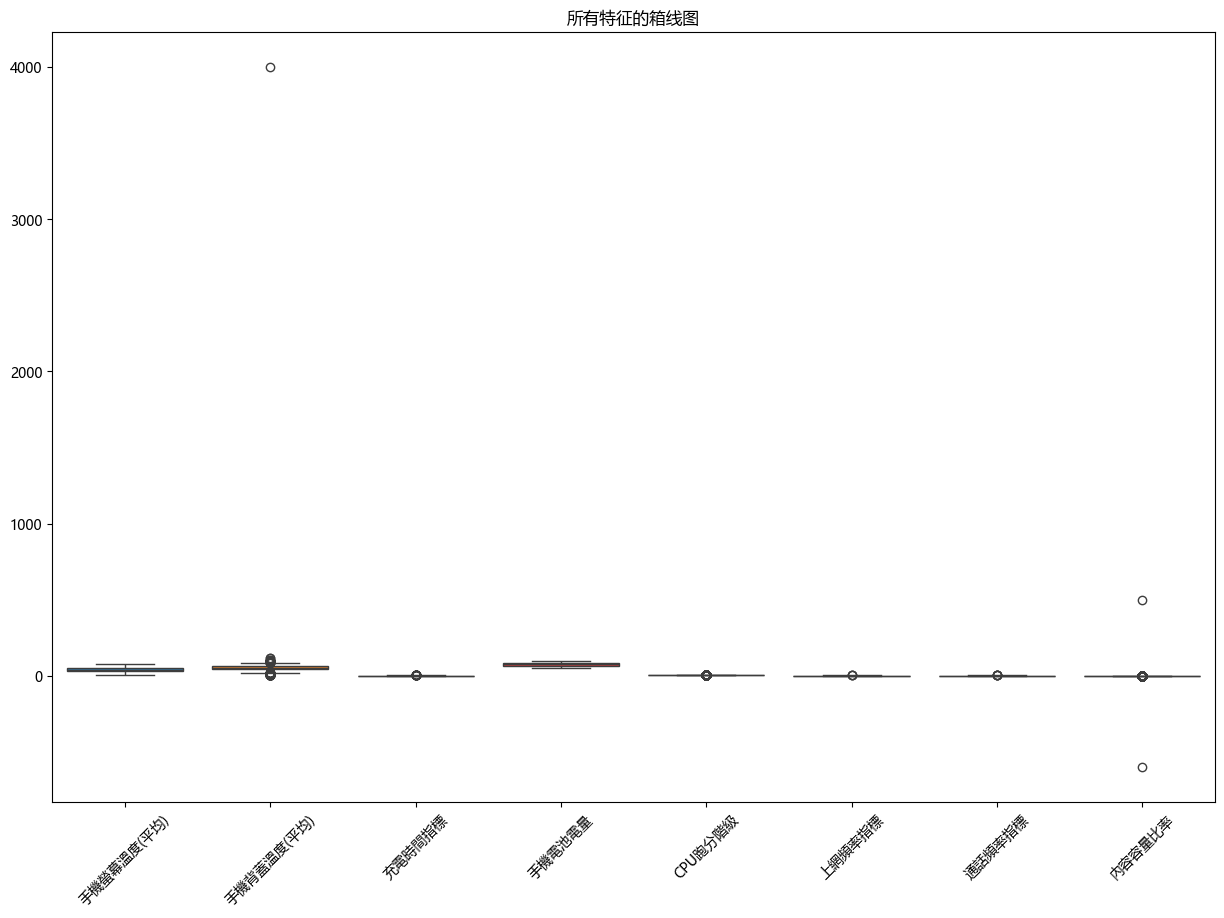

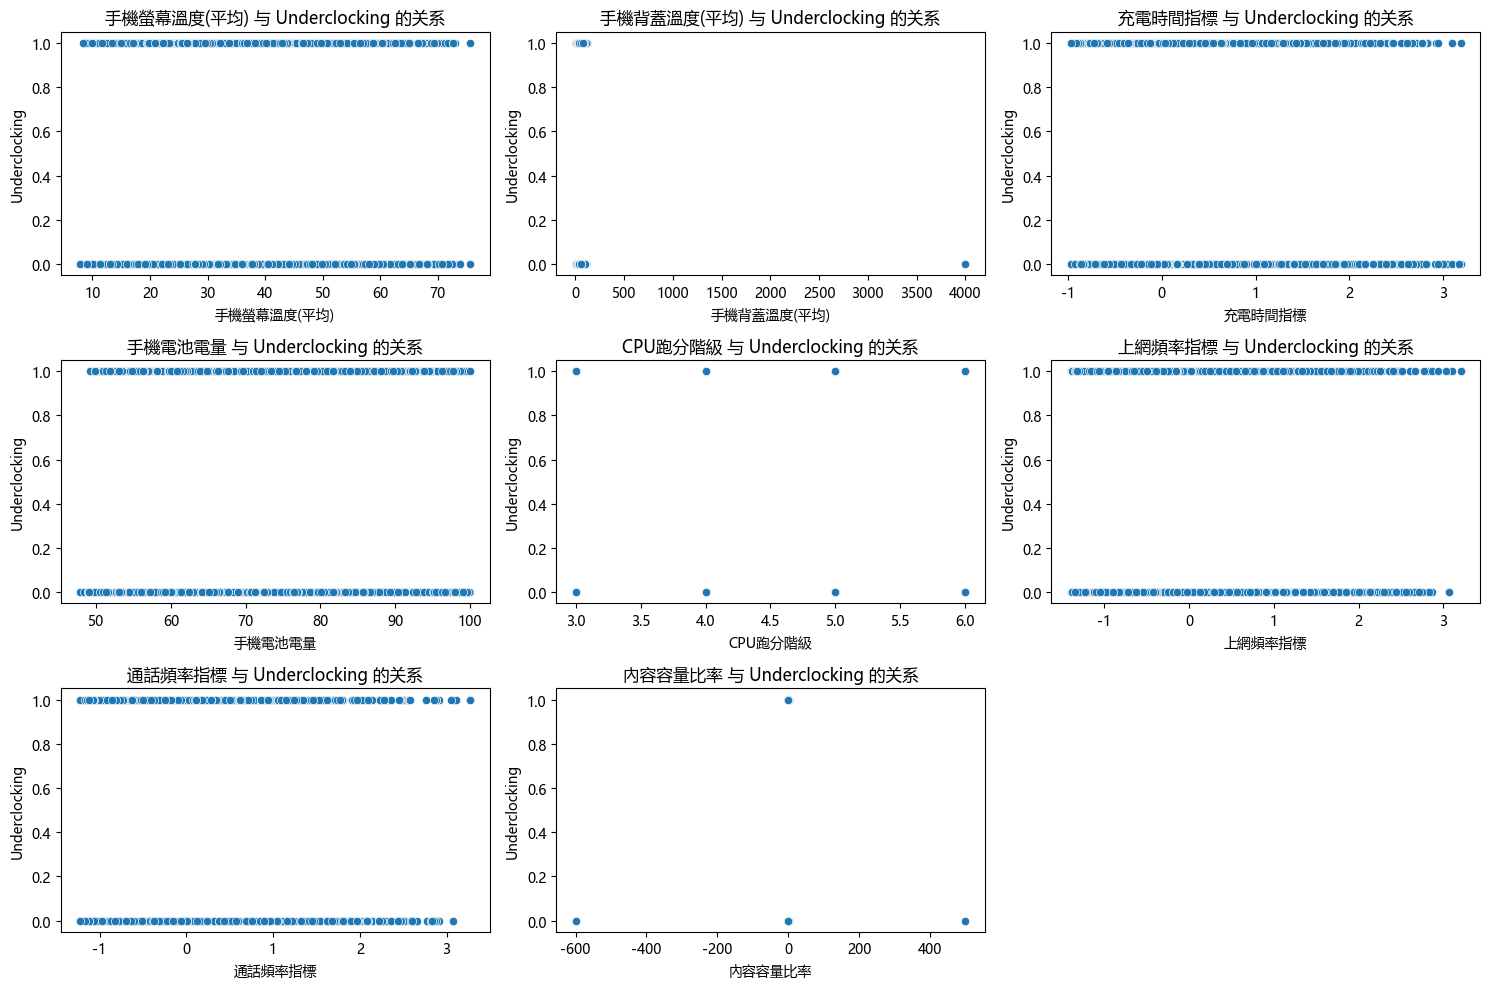

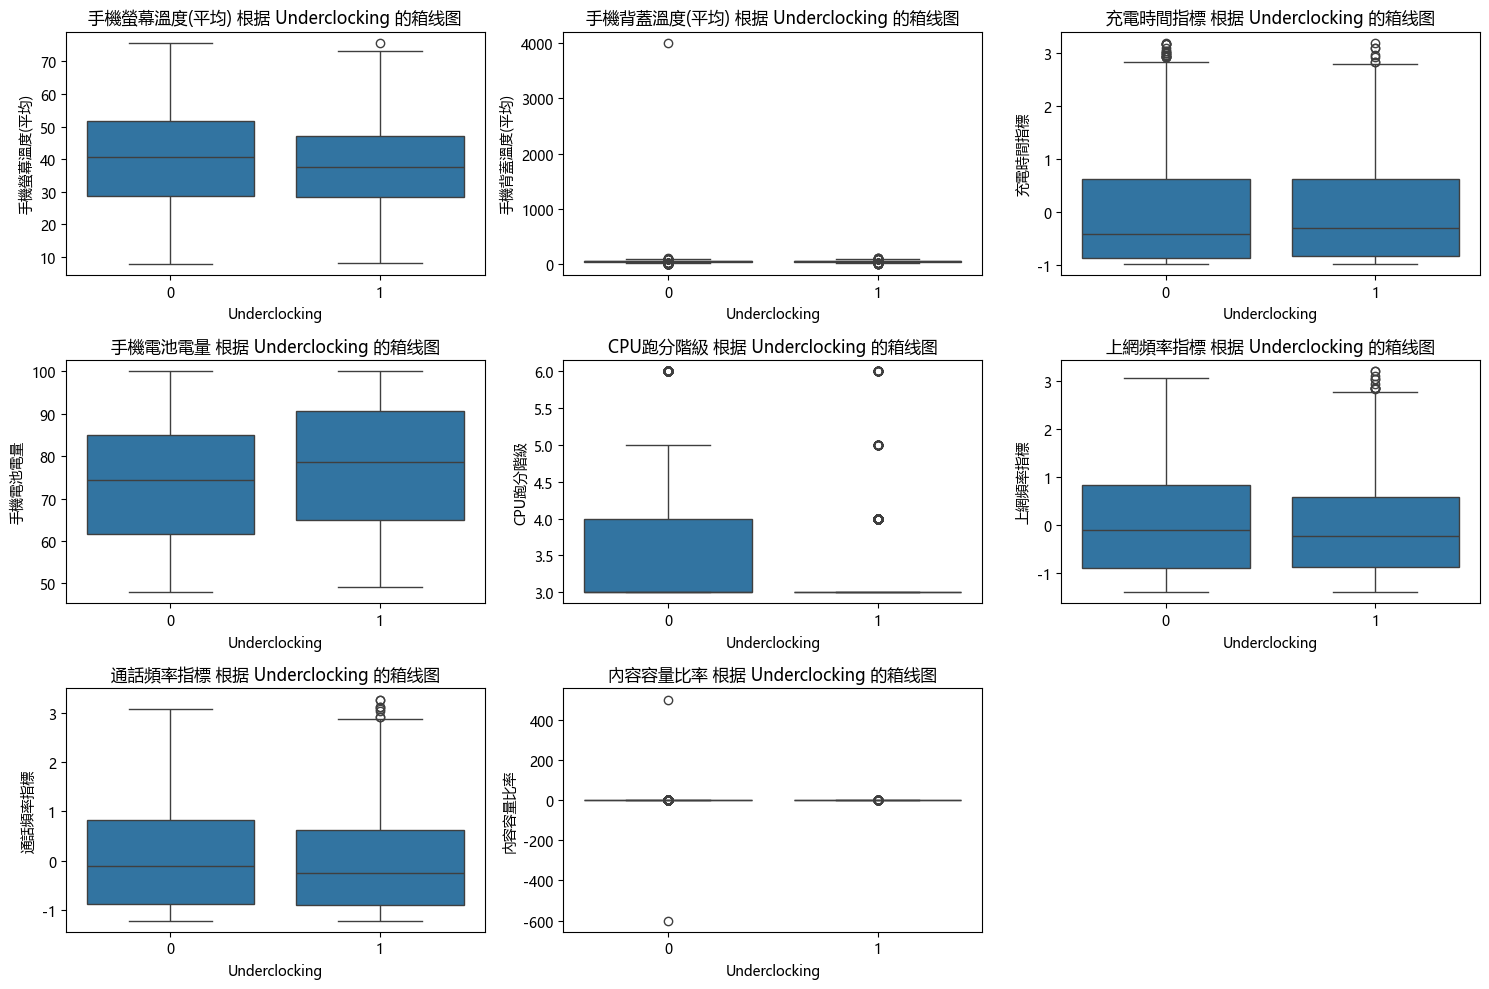

In [34]:
def feature_matrix_numpy(data, feature_ex):
    data_df = pd.DataFrame(data, columns=feature_ex)

    # 绘制每个特征的直方图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.histplot(data_df[feature], kde=True)
        plt.title(f'分布情况：{feature}')
    plt.tight_layout()
    plt.show()

    # 绘制所有特征的箱线图
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data_df)  # 正确使用 data_df
    plt.xticks(rotation=45)
    plt.title('所有特征的箱线图')
    plt.show()

def feature_target_relationship_dataframe(data, feature_ex, target_feature):

    # 每个特征与目标特征的散点图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.scatterplot(x=data[feature], y=data[target_feature])
        plt.title(f'{feature} 与 {target_feature} 的关系')
    plt.tight_layout()
    plt.show()

    # 每个特征与目标特征的箱线图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=data[target_feature], y=data[feature])
        plt.title(f'{feature} 根据 {target_feature} 的箱线图')
    plt.tight_layout()
    plt.show()

#===========================================================================
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
feature_matrix_numpy(x_data, feature_ex)  
feature_target_relationship_dataframe(data_train, feature_ex, 'Underclocking')  


In [35]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [36]:
from xgboost import XGBClassifier
import numpy as np 
# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate=  0.3,
                             max_depth=5,
                             gamma=4.499999999999998)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX, trainY)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX)
print('訓練集: ',xgboostModel.score(trainX,trainY))
print('測試集: ',xgboostModel.score(testX,testY))

訓練集:  0.7466367713004485
測試集:  0.6901408450704225


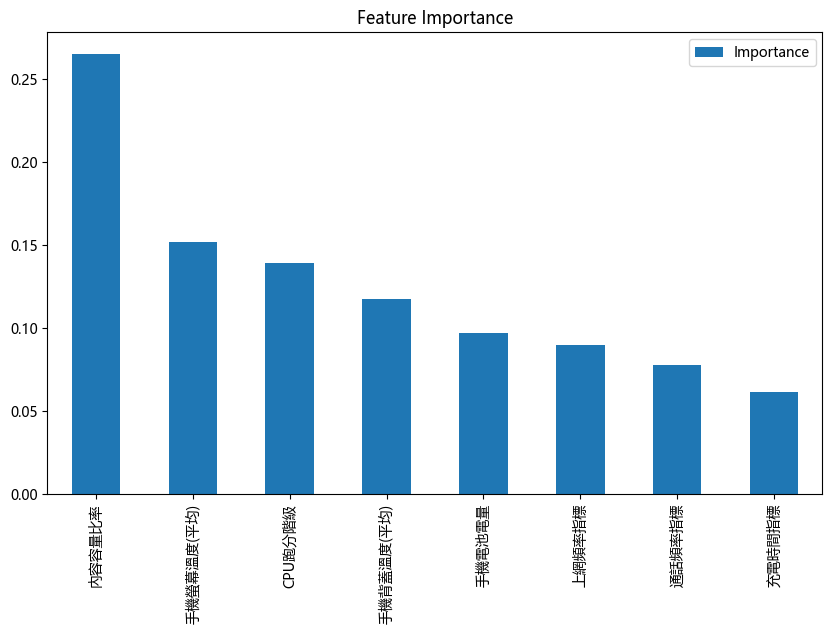

In [37]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [38]:


predicted_ans = svm_model.predict(data2)
my_submission = pd.DataFrame({'id': data3.id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)


NameError: name 'svm_model' is not defined

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

def xgboost_model_tuning(trainX, trainY):
    # 定义模型
    model = XGBClassifier(n_estimators=10000)

    # 设置参数网格
    param_grid = {
        'gamma': np.arange(4, 5, 0.01),  # 探索 gamma 值从 0 到 0.1，步长为 0.01
        'learning_rate': np.arange(0.3, 0.4, 0.01),
        'max_depth': np.arange(0, 6, 1)              # 同时探索不同的学习率
    }

    # 创建 GridSearchCV 对象
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                               scoring='accuracy', verbose=1, n_jobs=-1)

    # 运行网格搜索
    grid_search.fit(trainX, trainY)

    # 打印最佳参数和最佳模型的得分
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search

# 假设 trainX 和 trainY 已经是预处理好的训练数据
# 使用 trainX, trainY 调用函数
grid_search_result = xgboost_model_tuning(trainX, trainY)


Fitting 5 folds for each of 6600 candidates, totalling 33000 fits


KeyboardInterrupt: 

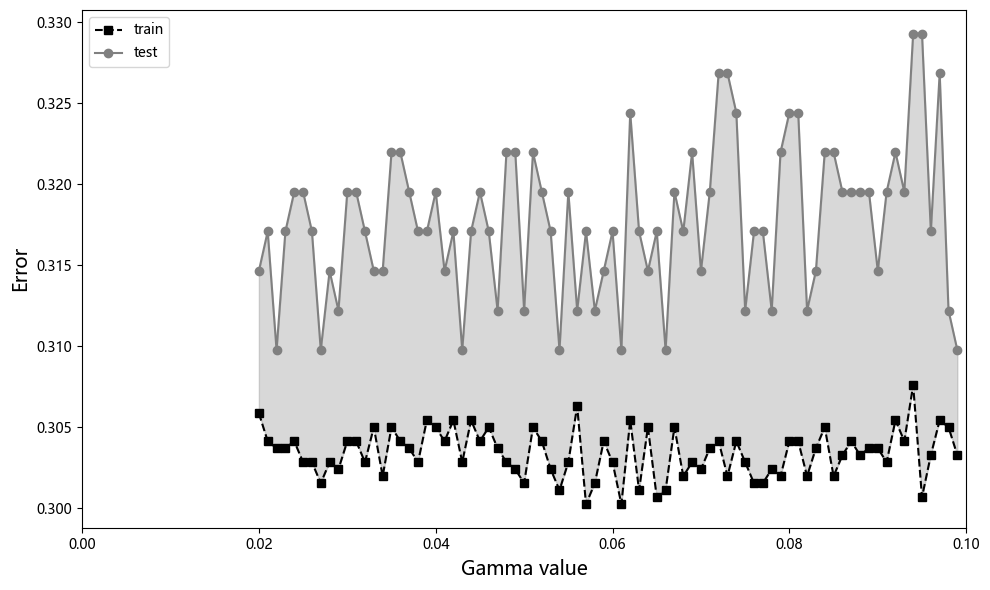

In [ ]:


def xgboostModel_fun(n=10000, lr=0.01, maxdepth=3, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

otrn = []
otst = []
change = 0.1
divisors = np.arange(0.02, change, 0.001)  # 这样 divisors 就与 otrn 和 otst 长度一致

for g in divisors:
    tree = xgboostModel_fun(lr=g) 
    tree.fit(trainX, trainY) 
    otrn.append(1 - tree.score(trainX, trainY)) 
    otst.append(1 - tree.score(testX, testY))

fig, ax = plt.subplots()
fig.set_size_inches((10, 6))
_=ax.plot(divisors, otrn, '--s', label='train', color='k')
_=ax.plot(divisors, otst, '-o', label='test', color='gray')
_=ax.fill_between(divisors, otrn, otst, color='gray', alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Gamma value', fontsize=14)  # 更正 x 轴标签
_=ax.set_ylabel('Error', fontsize=14)
_=ax.axis(xmin=0, xmax=change)  # xmax 为 change
fig.tight_layout()
